<center>
<img src="https://github.com/Yorko/mlcourse.ai/blob/master/img/ods_stickers.jpg?raw=true" />
    
<br>
    
<div style="font-weight:700;font-size:25px"> [mlcourse.ai](https://mlcourse.ai) - Open Machine Learning Course </div>

<br>

Auteurs: [Vitaliy Radchenko](https://www.linkedin.com/in/vitaliyradchenk0/) et [Yury Kashnitsky](https://yorko.github.io). Traduit et édité par [Christina Butsko](https://www.linkedin.com/in/christinabutsko/), [Egor Polusmak](https://www.linkedin.com/in/egor-polusmak/), [Anastasia Manokhina](https://www.linkedin.com/in/anastasiamanokhina/), [Anna Shirshova](http://linkedin.com/in/anna-shirshova-b908458b), [Yuanyuan Pao](https://www.linkedin.com/in/yuanyuanpao/) et [Ousmane Cissé](https://github.com/oussou-dev). Ce matériel est soumis aux termes et conditions de la licence [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). L'utilisation gratuite est autorisée à des fins non commerciales.

# <center> Thème 5. Ensembles et random forest</center>
<center>
<div style="font-weight:700;font-size:20px"> Partie 3. L'importance des variables ou caractéristiques (Features) </div>

</center>

<h1>Sommaire<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Essence-de-la-méthode" data-toc-modified-id="1.-Essence-de-la-méthode-1">1. Essence de la méthode</a></span></li><li><span><a href="#2.-Exemple-pratique" data-toc-modified-id="2.-Exemple-pratique-2">2. Exemple pratique</a></span></li><li><span><a href="#3.-Mission-de-démonstration" data-toc-modified-id="3.-Mission-de-démonstration-3">3. Mission de démonstration</a></span></li><li><span><a href="#4.-Ressources-utiles" data-toc-modified-id="4.-Ressources-utiles-4">4. Ressources utiles</a></span></li></ul></div>

Il est assez fréquent que vous souhaitiez déterminer les raisons exactes pour lesquelles l'algorithme fournit une réponse donnée. Ou du moins pour savoir quelles caractéristiques en entrée ont le plus contribué au résultat. Avec Random Forest, vous pouvez obtenir ces informations assez facilement.

## 1. Essence de la méthode

Dans l'image ci-dessous, il est intuitivement clair que, dans notre problème de notation, l' *Age* est beaucoup plus important que le (revenu) *income*. Ceci peut être expliqué formellement en utilisant le concept de *gain d’information*.

<img src="https://github.com/Yorko/mlcourse.ai/blob/master/img/credit_scoring_toy_tree_english.png?raw=true" align='center'>

Dans le cas de nombreux arbres de décision ou d'une forêt aléatoire, plus la position moyenne d'une caractéristique sur tous les arbres est proche de la racine (root), plus elle est significative pour un problème de classification ou de régression donné. Les gains du critère de partitionnement (division), tels que *l'impureté de Gini*, obtenus à chaque fractionnement optimal dans chaque arbre constituent une mesure d'importance directement associée à la variable de fractionnement. La valeur de ce score est distincte pour chaque variable et s’accumule sur tous les arbres.

Allons un peu plus loin dans les détails.

La réduction moyenne de la précision provoquée par une variable est déterminée lors du calcul de l'erreur out-of-bag. Plus la réduction de précision due à une exclusion ou à une permutation de la variable est importante, plus son *importance score* est élevé. Pour cette raison, les variables avec une réduction moyenne de l'exactitude plus grande sont généralement plus significatives pour la classification.

La réduction moyenne de l'impureté de Gini - ou *MSE* pour la régression - représente la contribution de chaque variable à l'homogénéité des noeuds et des feuilles dans le modèle de forêt aléatoire résultant. Chaque fois qu'une variable sélectionnée est utilisée pour le fractionnement, l'impureté de Gini des nœuds enfants est calculée et comparée à celle du nœud d'origine.

L'impureté de Gini est un score d'homogénéité allant de $0$ (homogène) à $1$ (hétérogène). Les modifications de la valeur du critère de fractionnement sont cumulées pour chaque variable et normalisées à la fin du calcul. Une réduction plus importante des impuretés de Gini signale que la partitionnement résultant de cette variable donne des nœuds de pureté supérieure.

Représentons maintenant cette méthode sous forme analytique (cette partie sera améliorée, [GitHub issue](https://github.com/Yorko/mlcourse.ai/issues/613)):

$$\large VI^{T} = \frac{\sum_{i \in \mathfrak{B}^T}I \Big(y_i=\hat{y}_i^{T}\Big)}{\Big |\mathfrak{B}^T\Big |} - \frac{\sum_{i \in \mathfrak{B}^T}I \Big(y_i=\hat{y}_{i,\pi_j}^{T}\Big)}{\Big |\mathfrak{B}^T\Big |}$$

où


* $\large \hat{y}_i^{(T)} = f^{T}(x_i)$ est une prédiction de classe avant la permutation ou l’exclusion de caractéristiques;

* $\large \hat{y}_{i,\pi_j}^{(T)} = f^{T}(x_{i,\pi_j})$ est une prédiction de classe après la permutation ou l’exclusion de caractéristiques;

* et $\large x_{i,\pi_j} = (x_{i,1}, \dots , x_{i,j-1}, \quad x_{\pi_j(i),j}, \quad x_{i,j+1}, \dots , x_{i,p})$.

* $\mathfrak{B}^T$ est l’échantillon sorti de l’arbre pour $T$

Notez que $\large VI^{T}(x_j) = 0$ si $\large x_j$ n'est pas dans l'arbre $\large T$.

Maintenant, nous pouvons donner le calcul de l'importance des caractéristiquess pour les ensembles


* non normalisé:

$$ \large VI(x_j) = \frac{\sum_{T=1}^{N}VI^{T}(x_j)}{N} $$


* normalisé par l'écart-type des différences:

$$ \large z_j = \frac{VI(x_j)}{\frac{\hat{\sigma}}{\sqrt{N}}} $$

## 2. Exemple pratique

Examinons les résultats d'une enquête auprès des visiteurs des auberges listées sur Booking.com et TripAdvisor.com. Nos variables (caractéristiques) ici sont les notes moyennes attribuées à différentes catégories, notamment la qualité du service, la condition de la chambre, le rapport qualité-prix, etc. Notre variable cible est la note globale de l'auberge sur le site.

In [1]:
from __future__ import division, print_function

# Disable warnings in Anaconda
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

# Set the font for titles in Russian
from matplotlib import rc
font = {'family': 'Verdana',
        'weight': 'normal'}
rc('font', **font)

import pandas as pd
import numpy as np
from sklearn.ensemble.forest import RandomForestRegressor

Feature ranking:
1. Staff 0.182757 
2. Value for money 0.148373 
3. Shared space condition 0.128296 
4. Extra services 0.116604 
5. Customer Co-creation 0.106668 
6. General conditions & conveniences 0.088589 
7. Shared kitchen condition 0.074273 
8. Check-in and check-out 0.061521 
9. Hostel booking 0.053615 
10. Room condition 0.039305 


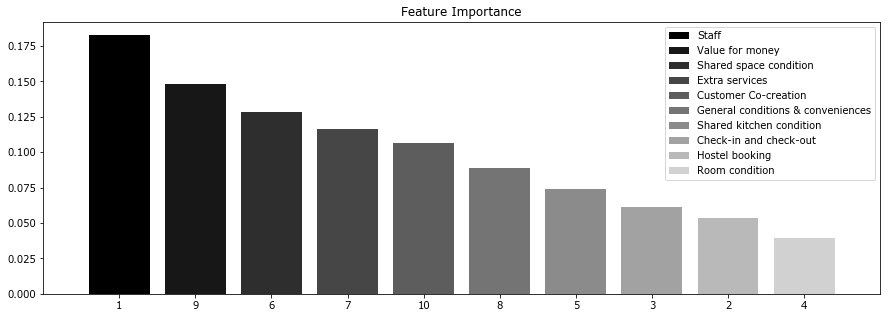

In [3]:
hostel_data = pd.read_csv("../../data/hostel_factors.csv")
features = {"f1":u"Staff",
"f2":u"Hostel booking",
"f3":u"Check-in and check-out",
"f4":u"Room condition",
"f5":u"Shared kitchen condition",
"f6":u"Shared space condition",
"f7":u"Extra services",
"f8":u"General conditions & conveniences",
"f9":u"Value for money",
"f10":u"Customer Co-creation"}

forest = RandomForestRegressor(n_estimators=1000, max_features=10,
                                random_state=0)

forest.fit(hostel_data.drop(['hostel', 'rating'], axis=1), 
           hostel_data['rating'])
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]
# Plot the feature importancies of the forest
num_to_plot = 10
feature_indices = [ind+1 for ind in indices[:num_to_plot]]

# Print the feature ranking
print("Feature ranking:")
  
for f in range(num_to_plot):
    print("%d. %s %f " % (f + 1, 
            features["f"+str(feature_indices[f])], 
            importances[indices[f]]))
plt.figure(figsize=(15,5))
plt.title(u"Feature Importance")
bars = plt.bar(range(num_to_plot), 
               importances[indices[:num_to_plot]],
       color=([str(i/float(num_to_plot+1)) 
               for i in range(num_to_plot)]),
               align="center")
ticks = plt.xticks(range(num_to_plot), 
                   feature_indices)
plt.xlim([-1, num_to_plot])
plt.legend(bars, [u''.join(features["f"+str(i)]) 
                  for i in feature_indices]);

La photo ci-dessus montre que, le plus souvent, les clients accordent une grande attention au personnel et au rapport qualité-prix. Ce couple de facteurs affecte le plus la note globale résultante. La différence entre ces deux caractéristiques et les autres n’est pas très grande. Nous pouvons donc en conclure que l’exclusion de l’une de ces caractéristiques entraînera une réduction de la précision du modèle. Cependant, sur la base de notre analyse, nous pouvons recommander aux propriétaires d’hôtels de se concentrer principalement sur la formation du personnel et le rapport qualité-prix.

## 3. Mission de démonstration
Vous pouvez vous entraîner avec [cette mission](https://www.kaggle.com/kashnitsky/a5-demo-logit-and-rf-for-credit-scoring). Il s'agit de travailler avec la régression logistique et le Random Forest sur une mission de notation de crédit. Avec une [solution](https://www.kaggle.com/kashnitsky/a5-demo-logit-and-rf-for-credit-scoring-sol) proposée.

## 4. Ressources utiles
- Listes des cours [site](https://mlcourse.ai), [repo github](https://github.com/Yorko/mlcourse.ai), et YouTube [channel](https://www.youtube.com/watch?v=QKTuw4PNOsU&list=PLVlY_7IJCMJeRfZ68eVfEcu-UcN9BbwiX)
- mlcourse.ai [lecture](https://www.youtube.com/watch?v=neXJL-AqI_c) on Random Forest
- Medium ["story"](https://medium.com/open-machine-learning-course/open-machine-learning-course-topic-5-ensembles-of-algorithms-and-random-forest-8e05246cbba7) based on this notebook
- Course materials as a [Kaggle Dataset](https://www.kaggle.com/kashnitsky/mlcourse)
- If you read Russian: an [article](https://habrahabr.ru/company/ods/blog/324402/) on Habrahabr with ~ the same material. And a [lecture](https://youtu.be/G0DmuuFeC30) on YouTube
- Chapter 15 of the book “[Elements of Statistical Learning](https://statweb.stanford.edu/~tibs/ElemStatLearn/)” by Jerome H. Friedman, Robert Tibshirani, and Trevor Hastie.
- More about practical applications of random forests and other algorithms can be found in the [official documentation](http://scikit-learn.org/stable/modules/ensemble.html) of `scikit-learn`.
- For a more in-depth discussion of variance and decorrelation of random forests, see the [original paper](https://www.stat.berkeley.edu/~breiman/randomforest2001.pdf).